# Removing features with low variance


## filter methods


'''
VarianceThreshold is a simple baseline approach to feature selection.
It removes all features whose variance doesn’t meet some threshold.
By default, it removes all zero-variance features, i.e.
features that have the same value in all samples.
'''

'''We can also go in the reverse direction (backward SFS),
i.e. start with all the features and greedily choose
features to remove one by one. We illustrate both approaches here.'''

In [16]:
.8 * (1 - .8)

0.15999999999999998

In [17]:
.8 * (1 - .8)

0.15999999999999998

In [18]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1],
     [0, 1, 0],
     [1, 0, 0],
     [0, 1, 1],
     [0, 1, 0],
     [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)


sel.get_support()

array([False,  True,  True])

'''
Selecting features with Sequential Feature Selection:
Another way of selecting features is to use SequentialFeatureSelector (SFS).
SFS is a greedy procedure where, at each iteration,
we choose the best new feature to add to our selected features based a cross-validation score.

  That is, we start with 0 features and choose the best single feature with the highest score.
The procedure is repeated until we reach the desired number of selected features
'''


In [19]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# Feature importance from coefficients
To get an idea of the importance of the features, we are going to use the RidgeCV estimator. The features with the highest absolute coef_ value are considered the most important. We can observe the coefficients directly without needing to scale them (or scale the data) because from the description above, we know that the features were already standardized

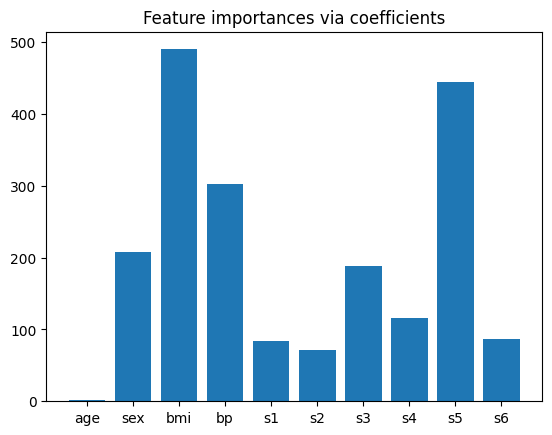

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=0.1).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

# Selecting features based on importance
Now we want to select the two features which are the most important according to the coefficients

In [21]:
from time import time

from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['bmi' 's5']
Done in 0.000s


# Selecting features with Sequential Feature Selection


*   Another way of selecting features is to use
SequentialFeatureSelector (SFS). SFS is a greedy procedure where, at each iteration, we choose the best new feature to add to our selected features based a cross-validation score. That is, we start with 0 features and choose the best single feature with the highest score. The procedure is repeated until we reach the desired number of selected features.


* We can also go in the reverse direction (backward SFS), i.e. start with all the features and greedily choose features to remove one by one. We illustrate both approaches here.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction="forward").fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['bmi' 's5']
Done in 0.248s
Features selected by backward sequential selection: ['bmi' 's5']
Done in 0.690s
